___
# <center> Visualizing A Forest of Stumps
___


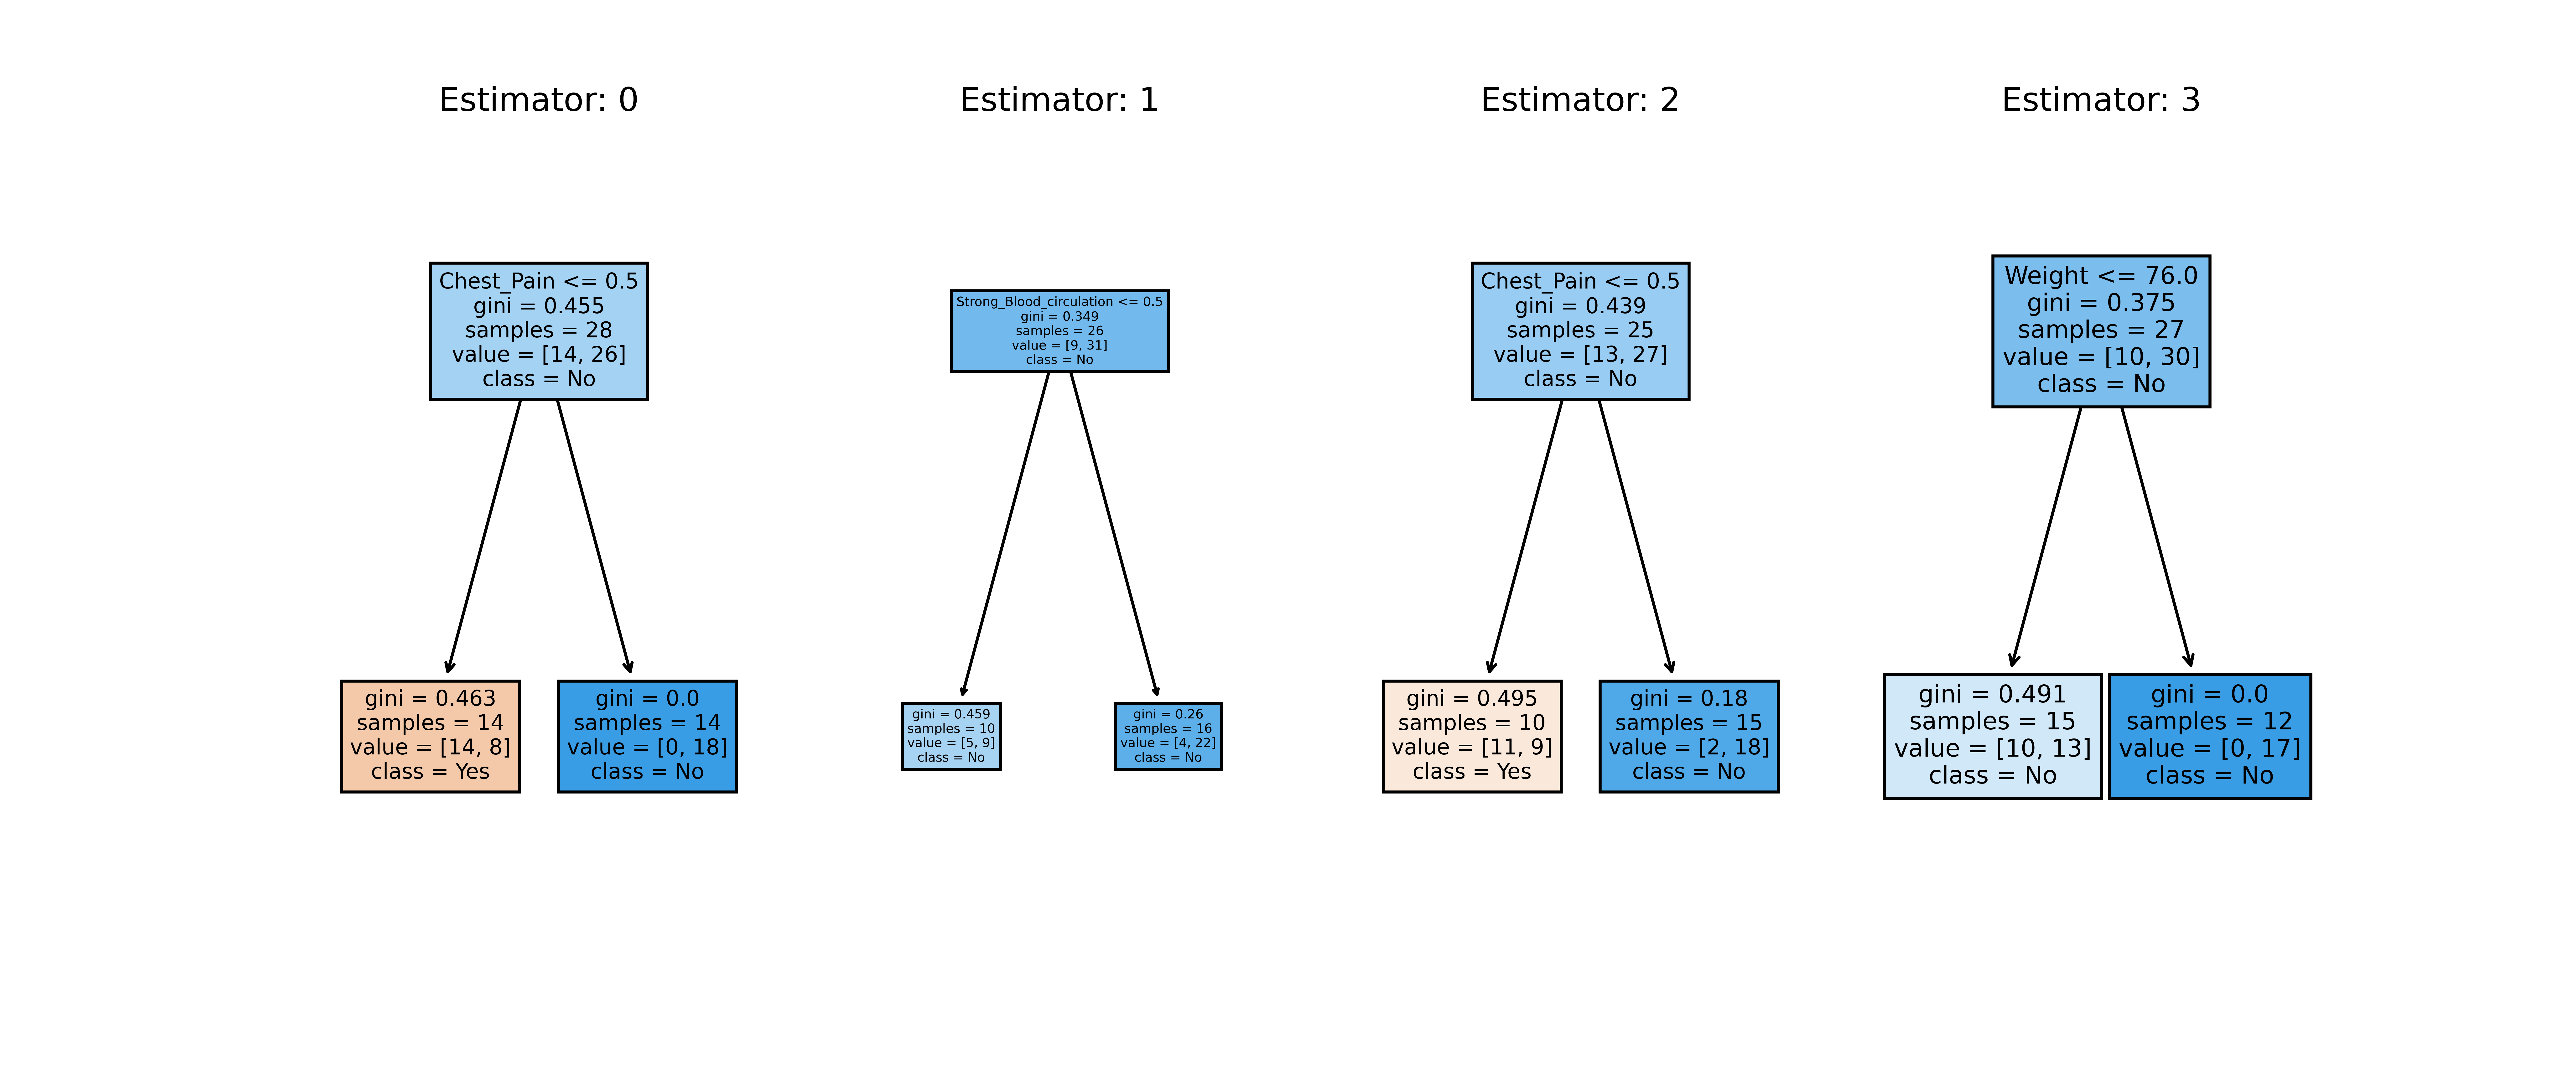

In [15]:
Image('AdaStumpForest.png')

___
# <center> What is Boosting?
1. When we discuss bossting we are refering to any Ensemble method that can combine several of these weak learner algorithyms into stronger learners. 


2. We do this by training our predictors sequentially (one after another), each trying to correct or focus more on its predecessor erros.
    
___
## <center> Terminology
We first need to understand the difference between weak and strong learners in the context of ML:
   - **Weak learning** performs slightly better than guessing
   - **Strong learning** has high accuracy


___
# <center> Random Forest Refresher
    
**Step One:**  
1. Create a Decision Tree with our bootstrapped dataset.
 
    
2. To get more variability in our trees, only consider a random subset of explanatory variables at each step.
___
**Step Two:** 
1. Repeat steps one n number of times to build a forest of decision trees.
    
___    
**Step Three:**      
Estimate the accuracy of the random forest:
   - We can now use our Out-of-Bag data as "Unseen Data" to test our RandomForest and measure its accuracy by the proportion of correctly classified OOB samples.
    
    
   - Our Out-of-Bag error is our proportion of wrong classifications.
    
    
   - We can no go back to step one bulding a random Forest and instead of using two random columns we can compare the Out-of-Bag error for different number of variables per step. 
___
**Step Four:**        
Select most accurate random forest based upon Out-of-Bag error.    
    
___
**Important Notes:**
    
    
1. Each tree has equal say and are not weighted.
    
    
2. Each tree is independent of one another.
    
    
3. Trees are usually full length or greater than just a stump (node and two leaves).
    
___
## <center> Random Forest Full sized


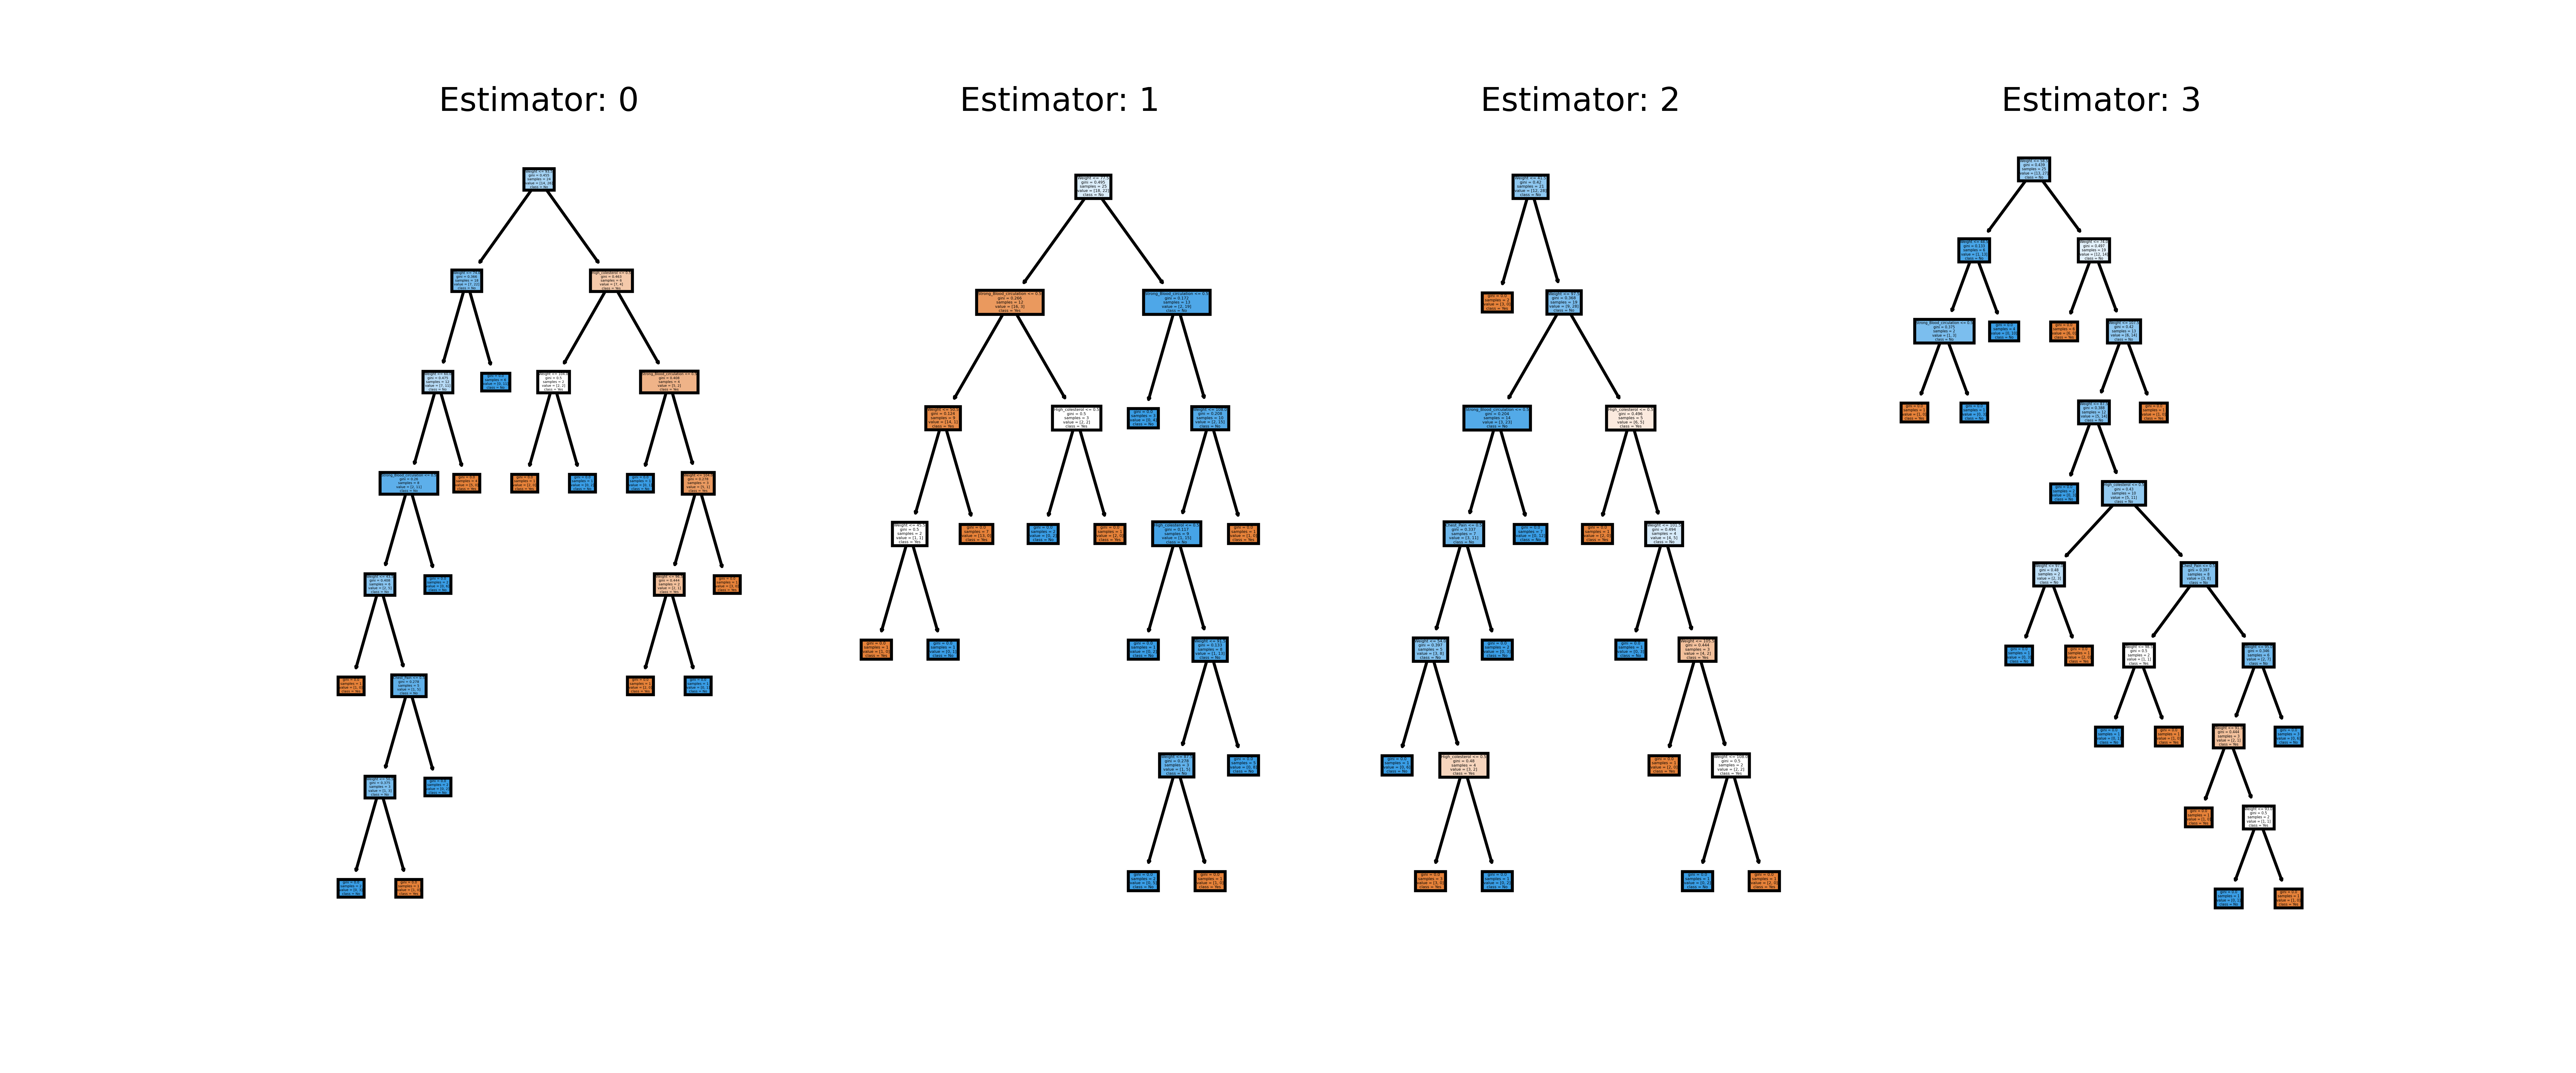

In [9]:
Image('rForstMax.png')

___
# <center> Adaboost Forests are usually just stumps 
1. Stumps are trees with a node and two leaves.
    
    
2. These are weak learners.
    
    
3. Unlike RF, with Adaboost some stumps are weighted in terms of voting.
    
    
4. Unlike RF where each tree is independent, with Adaboost order is important.
    
    
5. By paying more attention to the training instances that the predecessor underfitted a new predictor can correct its predecessor. Resultantly, new predictors focuse more and more on the hard cases.  
___   

## <center> Building A Forest of Stumps
    

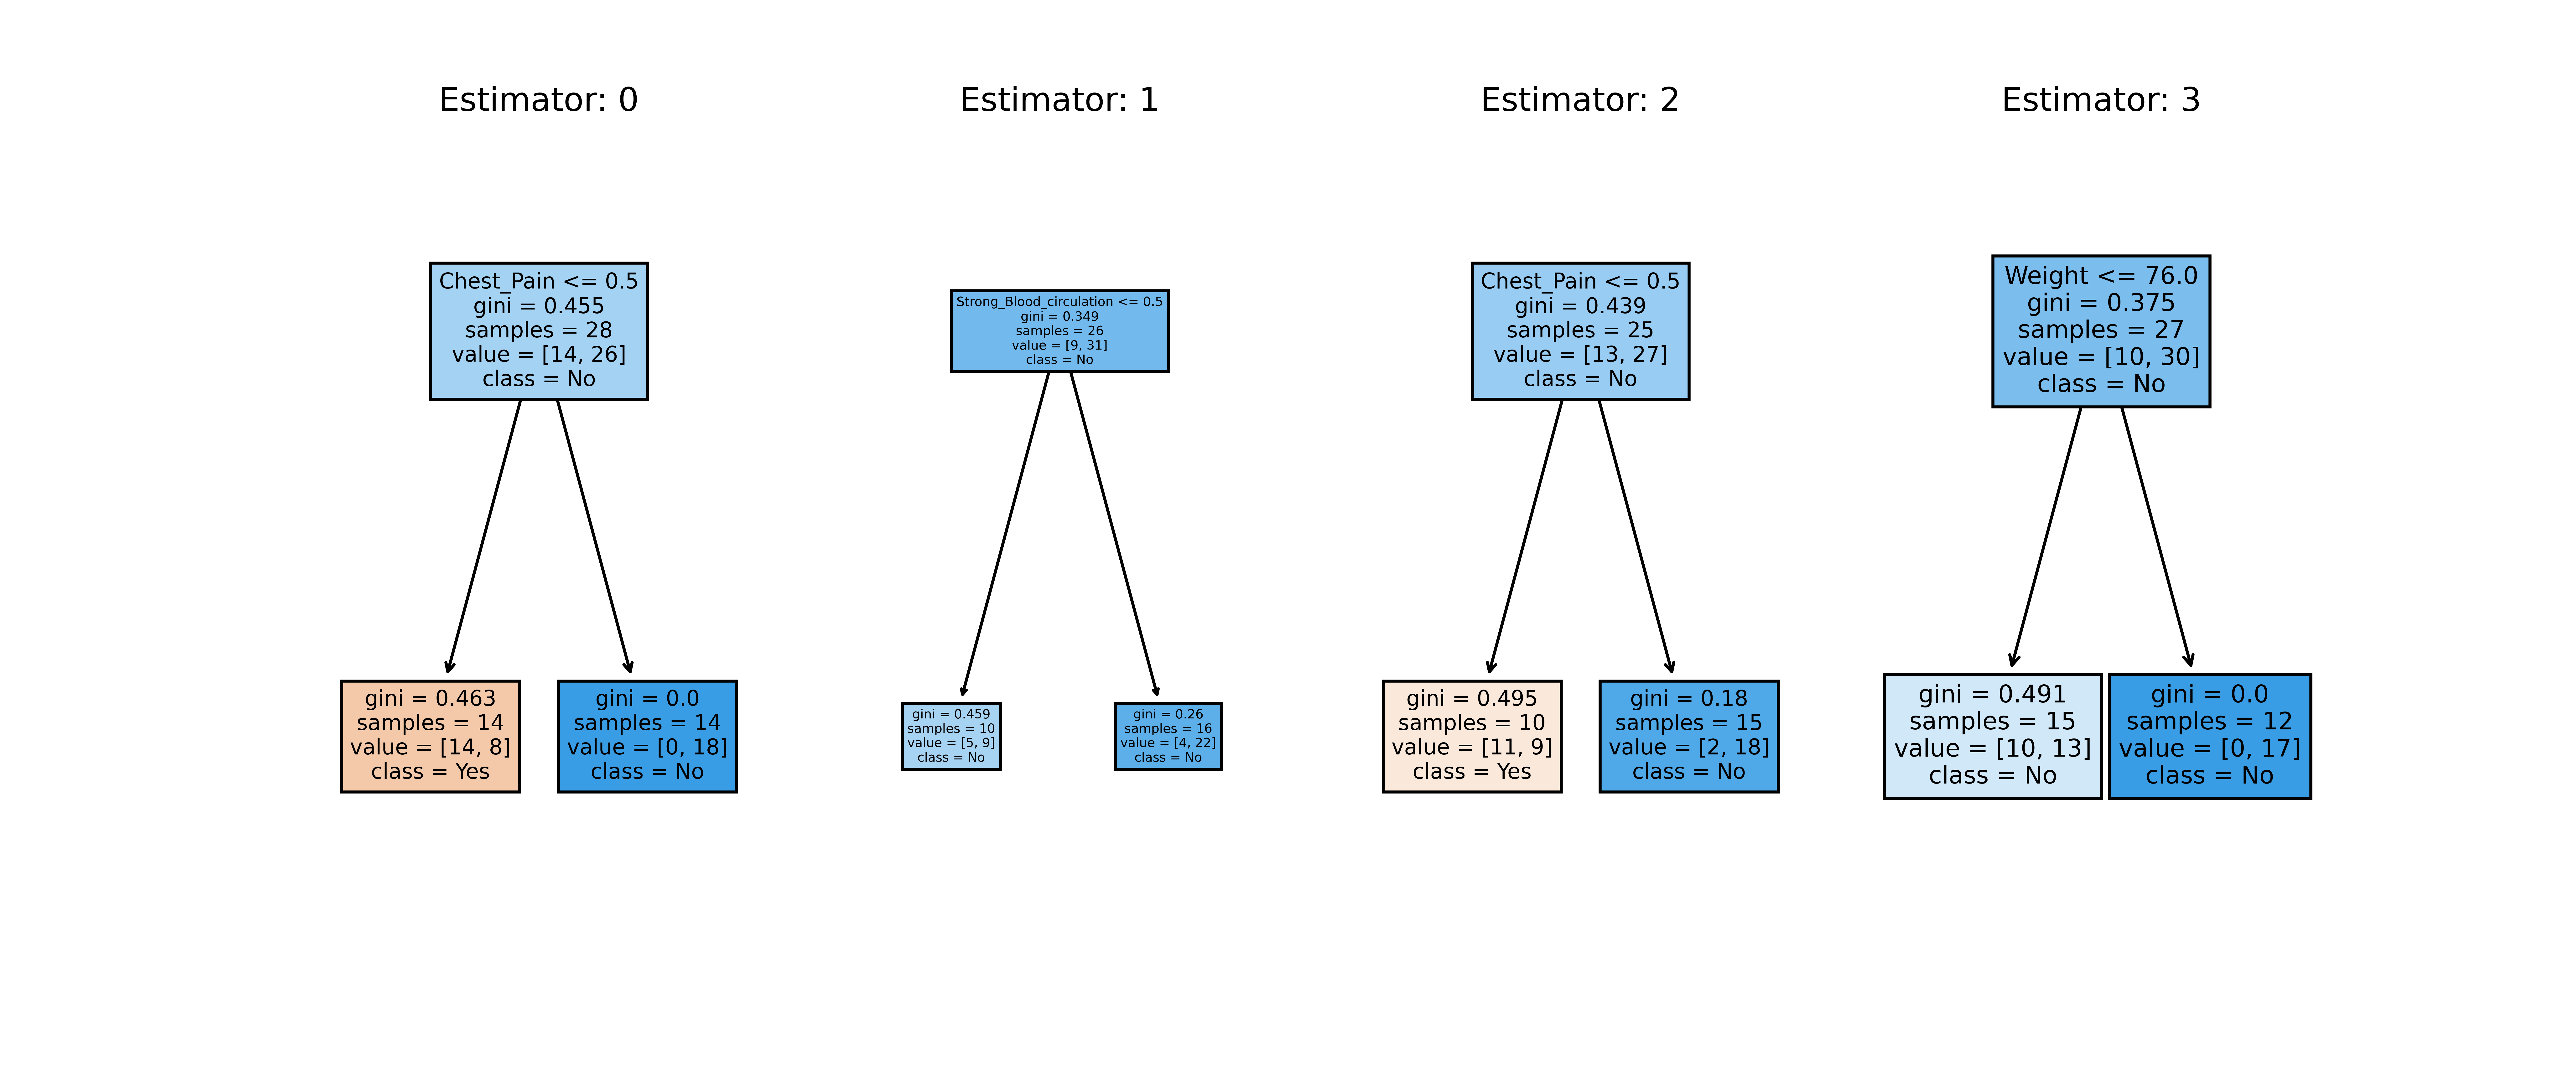

In [16]:
Image('AdaStumpForest.png')

___
# <center> Building an AdaBoost classifier:

**Step One:**  
1. A first base classifier is trained and used to make predictions on the training set. The relative weight of misclassified training instances is then increased. 

**Step Two:**      
1. A second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on.

___
# <center> AdaBoost algorithm

### <center> DataSet
$$\begin{array}{c|c}
  Observation & \text{Chest Pain} & \text{Weight} & \text{Heart Disease} \\
  \hline
  1&1 & 99  & 1 \\ 
  \hline
  2&1 & 106 & 1 \\  
  \hline
  3&1 & 107 & 1 \\
  \hline
 4 &1 & 100 & 1\\
  \hline
 5& 0 & 55 & 1 \\ 
  \hline
 6 &0 & 41 & 0\\  
  \hline
7 & 1 & 109 & 0 \\
  \hline
8 & 1 & 93 & 1\\
  \hline
 9& 0 & 40  & 0\\
  \hline
 10& 1 & 50& 1
 \end{array}$$  
   
___   
### <center> Initialize Weight column
$$ \begin{array}{c|c}
 Observation & \text{Chest Pain} & \text{Weight} & \text{Heart Disease} & \text{Sample Weight}\\
  \hline
 1& 1 & 99  & 1 & 0.1\\ 
  \hline
 2 &1 & 106 & 1 &0.1\\  
  \hline
 3& 1 & 107 & 1 &0.1\\
  \hline
4 & 1 & 100 & 1&0.1\\
  \hline
 5& 0 & 55 & 1 &0.1\\ 
  \hline
6 & 0 & 41 & 0&0.1\\  
  \hline
 7& 1 & 109 & 0 &0.1\\
  \hline
 8& 1 & 93 & 1&0.1\\
  \hline
9 & 0 & 40  & 0&0.1\\
  \hline
 10& 1 & 50& 1&0.1
 \end{array}$$    
    
___
## <center> For All our Variables we want to calculate their Gini Index for Classification tasks or MSE for Regression tasks in order to determine the Root Node (Purest Split)
<center> Below is a Classification task so we will be using the gini index to determine impurity.
    
___
### <center> Chest Pain 
$$\begin{array}{c|c}
   & Yes & No & Instances \\
  \hline
  Yes & 6 & 1 & 7  \\ 
  \hline
  No & 1 & 2 & 3 
 \end{array}$$
___
### <center> Gini Impurity
$$ GL = 1 - (\frac{6}{1+6})^{2} - (\frac{1}{1+6})^{2}$$  
  
  
$$= 0.2448 $$  
  
$$ GR = 1 - (\frac{1}{1+2})^{2} - (\frac{2}{1+2})^{2}$$  
  
  
$$= 0.44 $$  

#### <center> Weighted Average    
$$J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$    
 
    
    
$$\text{Weighted Average} = \frac{7}{7+3}0.2448 + \frac{3}{7+3}0.44 $$  
  
$$= 0.303 $$   


___

# <center> Continuous Variable
___
In classification tasks some of our explanatory variables may be in the form of continuous variables. Therefore, we have three steps to follow to caluclate the gini index:
    
1. Sort Observations by Continuous data.
    
    
2. Calcuate the average value of adjacent Observations.
    
    
3. Calculate the Gini Impurity For each Adjacent value
___

### <center> Weight 
$$\begin{array}{c|c}
  \text{Weight} & \text{Heart Disease} & \text{Adjacent Avg.}\\
  \hline   
   40  & 0 & \\
   \hline
   41 & 0 & 40.5  \\ 
   \hline
   50& 1 & 45.5 \\
   \hline
   55 & 1 & 52.5 \\
   \hline
    93 & 1 & 74 \\
   \hline
   99  & 1 & 96  \\ 
   \hline
  100 & 1 & 99.5  \\
  \hline
  106 & 1 & 103  \\  
  \hline
  107 & 1 & 106.5  \\
  \hline
  109 & 0 & 108
   \end{array}$$ 
    
___
    
### <center> 45.5
$$\begin{array}{c|c}
  Weight & Yes & No & Instances \\
  \hline
  45.5 \geq & 7 & 1 & 8 \\
  \hline
  45.5 \leq & 0 & 2 & 2 \\
  \end{array}$$ 
$$$$
<center> This would be done for each adjacent pair.
    
___    
### <center> Gini Impurity
    

$$ GL = 1 - (\frac{0}{2+0})^{2} - (\frac{2}{2+0})^{2}$$  
  
  
$$= 0 $$  
  
$$ GR = 1 - (\frac{7}{1+7})^{2} - (\frac{1}{1+7})^{2}$$  
  
  
$$= 0.21875 $$  

  
$$\text{Weighted Average} = \frac{2}{8+2}0 + \frac{8}{8+2}0.21875 $$  
  
$$= 0.175 $$   
    
___    
## <center> Decision For our Root Node:
    
### <center> Weight $\leq 45.5$ 
$$\begin{array}{c|c}
  Features & \text{Weighted Gini Index} \\
  \hline
  \text{Weight} \leq 45.5 &   0.175 \\ 
  \hline
  \text{ChestPain} & 0.303  \\  
 \end{array}$$
    
___ 


# <center> So this Will Be the First Stumpt in the Forest
___

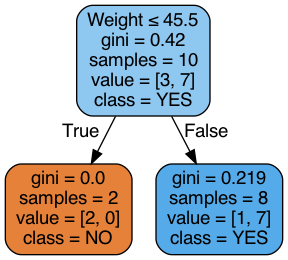

In [19]:
Image('AdaRoot.png')

___
# <center> How Much Say Does this Tree Have in Our Final Decision
___
    
We need to determine how much say this stump has in our final decision based on how well it classified our samples.
   - We can see in our right leaf our stump made 1 error.
    
   - The total error for a stump is the sum of the weights associated with the incorrectly classified samples

___
### <center> Weighted error rate of the $j^{th}$ predictor:

$$r_j = \frac{\sum_{\substack{
   i = 1 \\
   \hat{y}_j^{(i)} \neq y^{(i)}
  }}^{m} w^{(i)}}
  {\sum_{i=1}^{m}w^{(i)}}
  $$

where:

- $\hat{y}_j^{(i)}$: y is the $j^{th}$ predictor’s prediction for the $i^{th}$ instance.

- Each instance weight $w^{(i)}$ is initially set to $\frac{1}{m}$   
___   
#### <center> So Splitting on Weight $\leq 45.4$ resulted in one misclassification:
    
$$ \begin{array}{c|c}
  Observation &\text{Chest Pain} & \text{Weight} & \text{Heart Disease} & \text{Sample Weight}\\
  \hline
 1 &1 & 99  & 1 & 0.1\\ 
  \hline
  2&1 & 106 & 1 &0.1\\  
  \hline
 3 &1 & 107 & 1 &0.1\\
  \hline
 4 &1 & 100 & 1&0.1\\
  \hline
5 & 0 & 55 & 1 &0.1\\ 
  \hline
 6 &0 & 41 & 0&0.1\\  
  \hline
 {\color{red}7}& {\color{red}1} & {\color{red}{109}} & {\color{red}0} & {\color{red}{0.1}}\\
  \hline
 8 &1 & 93 & 1&0.1\\
  \hline
 9 &0 & 40  & 0&0.1\\
  \hline
 10& 1 & 50& 1&0.1
 \end{array}$$    
___
### <center> Using the Formula Above
    
$$\text{Sum of Misclassified Weights} = \sum_{\substack{
   i = 1 \\
   \hat{y}_j^{(i)} \neq y^{(i)}
  }}^{m}  = 0.1
  $$
    
$$\text{Sum of Sample Weights} = \sum_{i=1}^{m}w^{(i)}  = 1
  $$

$$r_j = 0.1$$
___
## <center> The predictor’s weight $α_j$ is then computed using the Equation: 

$$α_j=ηlog\frac{1-r_j}{r_j}$$
    
$$α_j=ηlog\frac{1-0.1}{0.1}$$
    
$$α_j= ηlog(9)$$


where:

- η is the learning rate hyperparameter
- The more accurate the predictor is, the higher its weight will be. 
___


___
## <center> Amount of Say Interpretation

1. The Blue Line below tells us the amount of say


2. When error is low we can see that total amount of say is high and vis versa
___

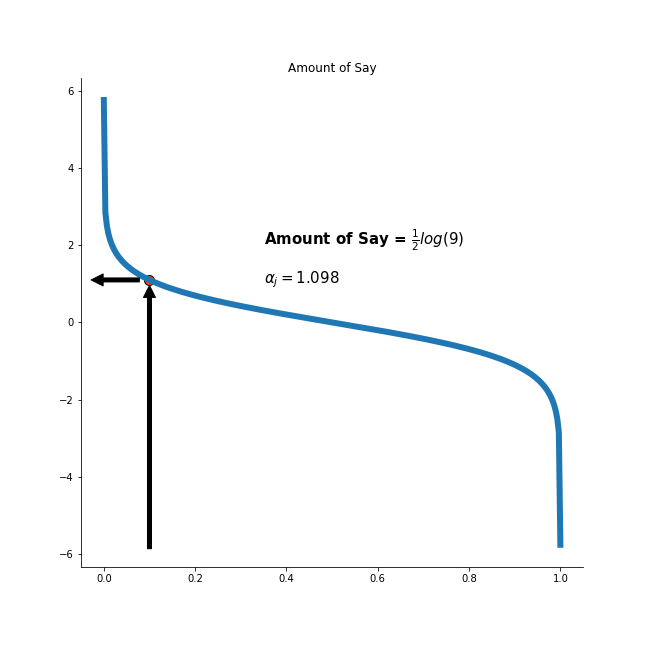

In [114]:
Image('AmountSay.png')

___
## <center> If we had used Chest Pain Example
___
    
#### <center> So Splitting on Chest_Pain resulted in Two misclassification:
    
$$ \begin{array}{c|c}
  \text{Chest Pain} & \text{Weight} & \text{Heart Disease} & \text{Sample Weight}\\
  \hline
  1 & 99  & 1 & 0.1\\ 
  \hline
  1 & 106 & 1 &0.1\\  
  \hline
  1 & 107 & 1 &0.1\\
  \hline
  1 & 100 & 1&0.1\\
  \hline
  {\color{red}0} & {\color{red}{55}}  & {\color{red}1} &{\color{red}{0.1}}\\ 
  \hline
  0 & 41 & 0&0.1\\  
  \hline
  {\color{red}1} & {\color{red}{109}} & {\color{red}0} & {\color{red}{0.1}}\\
  \hline
  1 & 93 & 1&0.1\\
  \hline
  0 & 40  & 0&0.1\\
  \hline
  1 & 50& 1&0.1
 \end{array}$$    
   

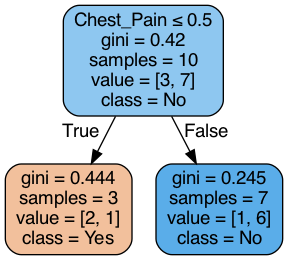

In [23]:
Image('ChestPainAda.png')

___
## <center> Amount of Say With 4 Misclassification Interpretation

1. The Blue Line below tells us the amount of say

    
2. We can see two misclassification were made above but lets assume chest_pain made 4 misclassification

    
3. With 4 misclassification the amount of say is illustrated below
___

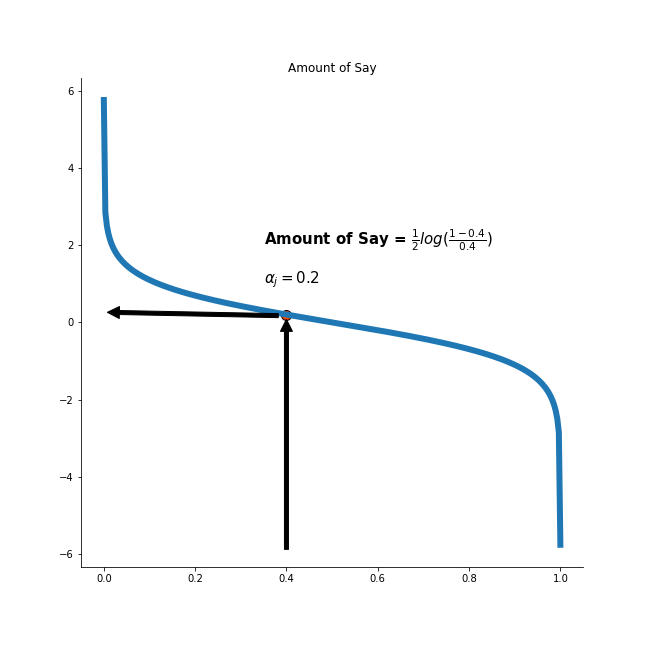

In [43]:
Image('ChestSay.png')

___
# Back To our Example
___
# <center> Updating our Obeservation Weights
    
<center> Adaboost pays more attention to the training instances that the predecessor underfitted so a new predictor can correct its predecessor. Resultantly, new predictors focuse more and more on the hard cases. So we need a formula that updates our samples weights based upon the previous misclassifications.
    
___    
    
   

### <center>Weight update rule

$$  w_i \gets
  \begin{cases}
    w_i      & \quad \text{if } \hat{y}_j^{(i)} = y^{(i)}\\
    w_i exp(\alpha_j)  & \quad \text{if } \hat{y}_j^{(i)} \neq y^{(i)}
  \end{cases}
$$
___

#### <center> Incorrect Observation weight update
$$w_i exp(\alpha_j)$$    


$$\text{New Sample Weight} = 0.1 \times e^{1.0986}$$
    
$$ = 0.3$$
___
#### <center> Correct Observation weight update    
$$w_i exp(-\alpha_j)$$ 
    
$$\text{New Sample Weight} = 0.1 \times e^{-1.0986}$$

$$ = 0.033$$
___
#### <center> We have also normalized our weights so they all add up to 1
$$ \begin{array}{c|c}
  \text{Chest Pain} & \text{Weight} & \text{Heart Disease} & \text{Sample Weight} & \text{New Weight} & \text{Normalized}\\
  \hline
  1 & 99  & 1 & 0.1 & 0.033 & 0.055\\ 
  \hline
  1 & 106 & 1 &0.1 & 0.033 & 0.055\\  
  \hline
  1 & 107 & 1 &0.1 & 0.033 & 0.055\\
  \hline
  1 & 100 & 1&0.1 & 0.033 & 0.055\\
  \hline
  0 & 55 & 1 &0.1 & 0.033 & 0.055\\ 
  \hline
  0 & 41 & 0&0.1 & 0.033 & 0.055\\  
  \hline
  {\color{red}1} & {\color{red}{109}} & {\color{red}0} & {\color{red}{0.1}} & {\color{red}{0.3}} &{\color{red}{0.5}}\\
  \hline
  1 & 93 & 1&0.1 & 0.033 & 0.055\\
  \hline
  0 & 40  & 0&0.1 & 0.033 & 0.055\\
  \hline
  1 & 50& 1&0.1 & 0.033 & 0.055
 \end{array}$$    
___ 
### <center> Updated Dataset 
$$ \begin{array}{c|c}
  Observation & \text{Chest Pain} & \text{Weight} & \text{Heart Disease} & \text{Sample Weight}\\
  \hline
  1&1 & 99  & 1 &  0.0556\\ 
  \hline
  2&1 & 106 & 1 & 0.0556\\  
  \hline
 3 &1 & 107 & 1 & 0.0556\\
  \hline
 4 &1 & 100 & 1& 0.0556\\
  \hline
 5 &0 & 55 & 1 & 0.0556\\ 
  \hline
 6 &0 & 41 & 0& 0.0556\\  
  \hline
 7 &{\color{red}1} & {\color{red}{109}}& 0   &{\color{red}{0.5}}\\
  \hline
 8 &1 & 93 & 1 & 0.0556\\
  \hline
9 & 0 & 40  & 0 & 0.0556\\
  \hline
 10 &1 & 50& 1&  0.0556
 \end{array}$$     
 
 

___
# <center> Building an AdaBoost classifier:
## <center> Second Stump
1. We can either use a weighted Gini Index.
  
    
2. Resample with our new weights 
    

I have chosen to resample with our new weights:
   - We can see index 7 had a higher weight and now it appears more in our new dataframe.

___

## <center> Resampling With Replacement Based on Weights
    
$$ \begin{array}{c|c}
  Observation & \text{Chest Pain} & \text{Weight} & \text{Heart Disease} & \text{Sample Weight}\\
  \hline
  3&1 & 107 & 1 & 0.0556\\ 
  \hline
  3&1 & 107 & 1 & 0.0556\\  
  \hline
  10&1 & 50& 1&  0.0556\\
  \hline
  9&0 & 40  & 0 & 0.0556\\
  \hline
  4&1 & 100 & 1& 0.0556\\ 
  \hline
  5& 0 & 55 & 1 & 0.0556\\  
  \hline
  {\color{red}9}&{\color{red}1} & {\color{red}{109}}& 0   &{\color{red}{0.5}}\\
  \hline
  {\color{red}9}&{\color{red}1} & {\color{red}{109}}& 0   &{\color{red}{0.5}}\\
  \hline
 5& 0 & 55 & 1 & 0.0556\\
  \hline
  {\color{red}9}&{\color{red}1} & {\color{red}{109}}& 0   &{\color{red}{0.5}}
 \end{array}$$  
    
___
## <center> Bring our weights back to Normal
    
1. We can now see how our first tree has impacted the creation of our dataset upon which our second tree will be made.
    

2. This process is repeated until we have reached our desired number of trees or no new improvement is made.
___
    
$$ \begin{array}{c|c}
  Observation & \text{Chest Pain} & \text{Weight} & \text{Heart Disease} & \text{Sample Weight}\\
  \hline
  3&1 & 107 & 1 & 0.1\\ 
  \hline
  3&1 & 107 & 1 & 0.1\\  
  \hline
 10& 1 & 50& 1&  0.1\\
  \hline
 9& 0 & 40  & 0 & 0.1\\
  \hline
 4& 1 & 100 & 1& 0.1\\ 
  \hline
 5& 0 & 55 & 1 & 0.1\\  
  \hline
 9 & 1 & 109& 0   &0.1\\
  \hline
 9 & 1 & 109& 0   &0.1\\
  \hline
 5& 0 & 55 & 1 & 0.1\\
  \hline
9 &  1 & 109& 0   &0.1
 \end{array}$$  
    

___ 
# <center> Prediction
## <center> Given the Data Below Does the Person Have Heart Disease
___
#### <center> Run the data through the tree below
$$\begin{array}{c|c}
   \text{Chest Pain} & \text{Weight} & \text{Heart Disease} \\
  \hline
   0 & 92 & ? 
 \end{array}$$
    
___


1. For predictions we run our new observations down each stump and see which leave it ends up in (Has HD or Does Not Have HD). 
    
    
2. We can add up the amount of the say the stumps that predict has heart disaese and compare to the sum of the amount of say the stumps that predict no heart disaese. 
    
    
3. The highest sum is what we classify our new input observations as. 
___

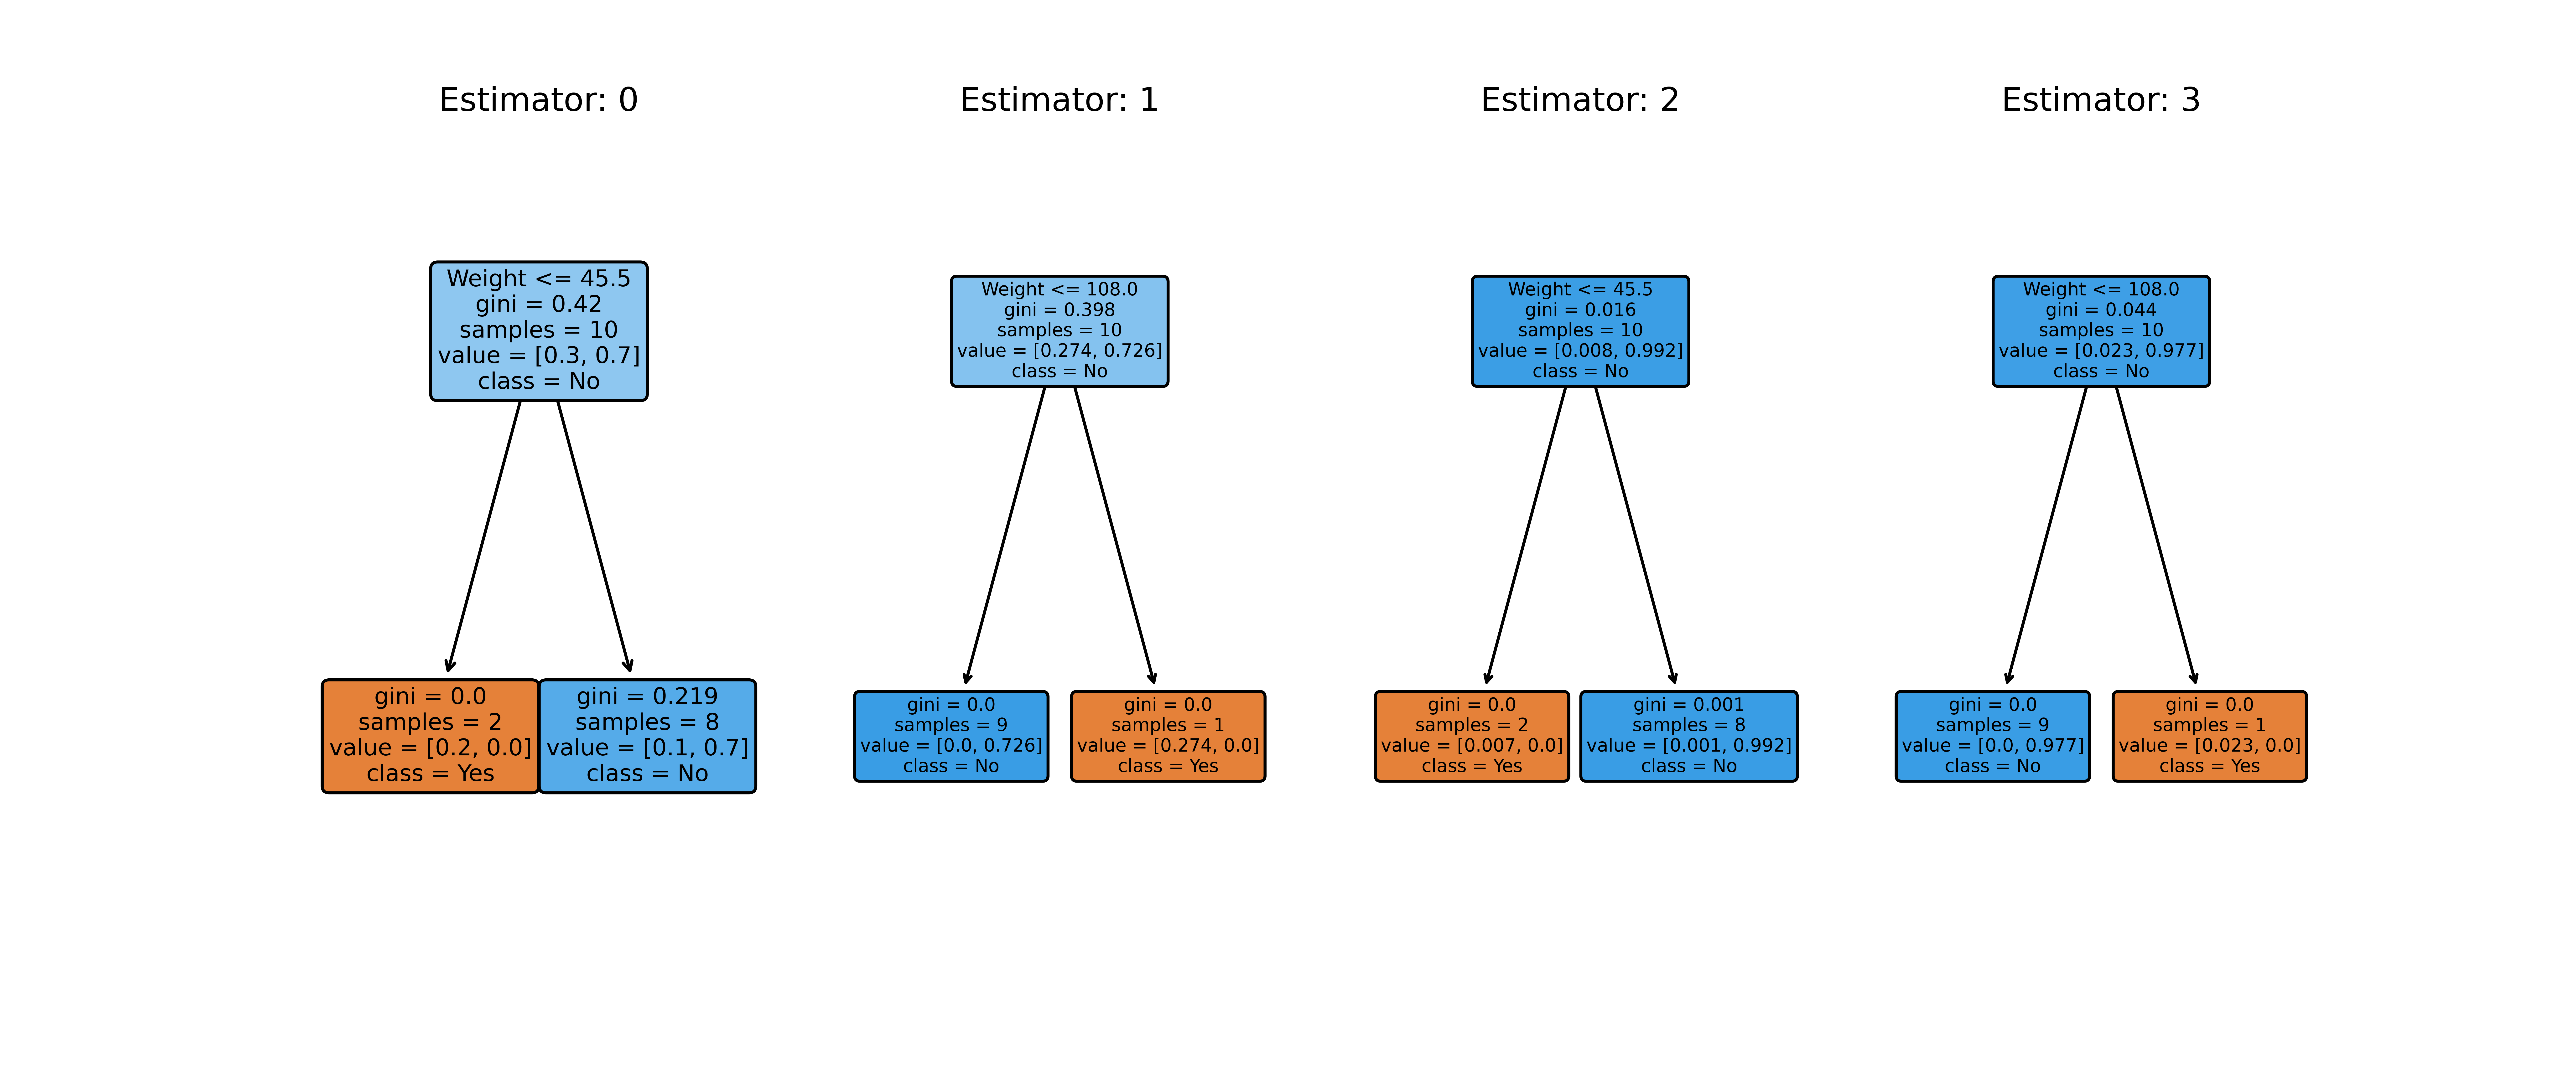

In [56]:
Image('SklearnAdaVis.png')

___
# <center> Appendix

**Libraries**:
```
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pandas as pd
import scipy
from IPython.display import display
from IPython.display import Image
from sklearn.datasets import make_regression
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostClassifier
```
**Full SIzed RandomForest**:
```
np.random.seed(40)
# creating our dataset
df1 = pd.DataFrame({'Chest_Pain': np.random.choice(['1', '0'],p = [0.8,0.2], size=20),"Weight": np.random.randint(81,110,20), 'High_colesterol': np.random.choice(['1', '0'],p = [0.8,0.2], size=20),
                   'Strong_Blood_circulation': np.random.choice(['1', '0'],p = [0.8,0.2], size=20), "Heart_disease":np.random.choice(['1', '0'], p = [0.8,0.2], size=20)})

df2 = pd.DataFrame({'Chest_Pain': np.random.choice(['1', '0'],p = [0.2,0.8], size=20),"Weight": np.random.randint(40,80,20), 'High_colesterol': np.random.choice(['1', '0'],p = [0.3,0.7], size=20),
                   'Strong_Blood_circulation': np.random.choice(['1', '0'],p = [0.2,0.8], size=20), "Heart_disease":np.random.choice(['1', '0'], p = [0.2,0.8], size=20)})

rf = pd.concat([df1,df2],axis=0)
rf = rf.reset_index(drop=True)

X = rf.drop('Heart_disease',axis=1).values
y = rf['Heart_disease'].values

fn=rf.columns
cn=['Yes','No']

clf = RandomForestClassifier()
clf = clf.fit(X,y)

fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = [12,5], dpi=900)
for index in range(0, 4):
    tree.plot_tree(clf.estimators_[index],
                   filled = True,
                   feature_names = fn, 
                   class_names=cn,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

fig.savefig('rForstMax.png')
```
**Visualizing a Forest of Stumps**:
```
np.random.seed(40)
# creating our dataset
df1 = pd.DataFrame({'Chest_Pain': np.random.choice(['1', '0'],p = [0.8,0.2], size=20),"Weight": np.random.randint(81,110,20), 'High_colesterol': np.random.choice(['1', '0'],p = [0.8,0.2], size=20),
                   'Strong_Blood_circulation': np.random.choice(['1', '0'],p = [0.8,0.2], size=20), "Heart_disease":np.random.choice(['1', '0'], p = [0.8,0.2], size=20)})

df2 = pd.DataFrame({'Chest_Pain': np.random.choice(['1', '0'],p = [0.2,0.8], size=20),"Weight": np.random.randint(40,80,20), 'High_colesterol': np.random.choice(['1', '0'],p = [0.3,0.7], size=20),
                   'Strong_Blood_circulation': np.random.choice(['1', '0'],p = [0.2,0.8], size=20), "Heart_disease":np.random.choice(['1', '0'], p = [0.2,0.8], size=20)})

rf = pd.concat([df1,df2],axis=0)
rf = rf.reset_index(drop=True)

# Sampling with replacement
bootstrapped = rf.sample(replace = True, n =40)

X = bootstrapped.drop('Heart_disease',axis=1).values
y = bootstrapped['Heart_disease'].values

fn=bootstrapped.columns
cn=['Yes','No']



clf = RandomForestClassifier(max_depth = 1)
clf = clf.fit(X,y)

fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = [12,5], dpi=900)
for index in range(0, 4):
    tree.plot_tree(clf.estimators_[index],
                   filled = True,
                   feature_names = fn, 
                   class_names=cn,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
    
fig.savefig('AdaStumpForest.png')
```
**AdaRoot**:
```
np.random.seed(45)
ada = rf.sample(replace = False, n =10)

ada['Sample_Weight'] = 1/len(ada)

X1 = ada.drop(['Heart_disease','Sample_Weight'],axis=1).values
y1 = ada['Heart_disease'].values

fn=ada.columns[:-2]
cn=['NO','YES']

tree_classifier = DecisionTreeClassifier(max_depth = 1)
tree_classifier = tree_classifier.fit(X1,y1)

dot_data = tree.export_graphviz(tree_classifier, out_file=None, 
                     feature_names= fn,  
                     class_names=cn,  
                     filled=True, rounded=True,  
                    special_characters=True)  
p = graphviz.Source(dot_data) 

p.format = 'png'
p.filename = 'AdaRoot'
p.render()
```
**Chest Pain Ada**:
```
X = ada['Chest_Pain'].values.reshape(-1,1)
y = ada['Heart_disease'].values

fn= np.array([ada.columns[0]])
cn=['Yes','No']

tree_classifier = DecisionTreeClassifier(max_depth = 1)
tree_classifier = tree_classifier.fit(X,y)

dot_data = tree.export_graphviz(tree_classifier, out_file=None, 
                     feature_names= fn,  
                     class_names=cn,  
                     filled=True, rounded=True,  
                    special_characters=True)  
z = graphviz.Source(dot_data)
z.format = 'png'
z.filename = 'ChestPainAda'
z.render()
```
    
**calculating amount of say**:
```
weighted_sum = 0.1*4
inncorrect_patients = (1-weighted_sum)/weighted_sum
error = 1/2*np.log(inncorrect_patients)


a = np.linspace(0.00001,0.99999,300)
total_error = []
for x in a:
    patients = (1-a)/a
    total_error.append(1/2*np.log(patients))

#Plotting
fig,ax1 = plt.subplots(figsize=(9,9))


ax1.plot(a,total_error[0], linewidth = 6)
ax1.scatter(0.4,error,c ='#FF4500',edgecolor = 'black',s = 100)

ax1.annotate('', xy=(0.4, error), xytext=(0.4, -6),
            arrowprops=dict(facecolor='black', shrink=0.02))

ax1.annotate('', xy=(0, error+0.06), xytext=(0.39, error -0.03),
            arrowprops=dict(facecolor='black', shrink=0.02))

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.text(0.35, 2, 'Amount of Say = $ \\frac{1}{2}log(\\frac{1-0.4}{0.4})$', fontsize = 15, weight='bold')
ax1.text(0.35, 1, '$\\alpha_j=0.2$', fontsize = 15, weight='bold')

# Providing subplots with titles
ax1.title.set_text('Amount of Say')

fig.savefig('ChestSay.png')
```


**calculating amount of say**:
```
weighted_sum = 0.1*1
inncorrect_patients = (1-weighted_sum)/weighted_sum
error = 1/2*np.log(inncorrect_patients)
error

a = np.linspace(0.00001,0.99999,300)
total_error = []
for x in a:
    patients = (1-a)/a
    total_error.append(1/2*np.log(patients))

#Plotting
fig,ax1 = plt.subplots(figsize=(9,9))


ax1.plot(a,total_error[0], linewidth = 6)
ax1.scatter(0.1,error,c ='#FF4500',edgecolor = 'black',s = 100)

ax1.annotate('', xy=(0.1, error), xytext=(0.1, -6),
            arrowprops=dict(facecolor='black', shrink=0.02))

ax1.annotate('', xy=(-0.03, error), xytext=(0.08, error),
            arrowprops=dict(facecolor='black', shrink=0.02))

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.text(0.35, 2, 'Amount of Say = $ \\frac{1}{2}log(9)$', fontsize = 15, weight='bold')
ax1.text(0.35, 1, '$\\alpha_j=1.098$', fontsize = 15, weight='bold')

# Providing subplots with titles
ax1.title.set_text('Amount of Say')

```
**Sklearn AdaVisulaization**:
```
np.random.seed(40)
# creating our dataset
df1 = pd.DataFrame({'Chest_Pain': np.random.choice(['1', '0'],p = [0.8,0.2], size=20),"Weight": np.random.randint(81,110,20), 'High_colesterol': np.random.choice(['1', '0'],p = [0.8,0.2], size=20),
                   'Strong_Blood_circulation': np.random.choice(['1', '0'],p = [0.8,0.2], size=20), "Heart_disease":np.random.choice(['1', '0'], p = [0.8,0.2], size=20)})

df2 = pd.DataFrame({'Chest_Pain': np.random.choice(['1', '0'],p = [0.2,0.8], size=20),"Weight": np.random.randint(40,80,20), 'High_colesterol': np.random.choice(['1', '0'],p = [0.3,0.7], size=20),
                   'Strong_Blood_circulation': np.random.choice(['1', '0'],p = [0.2,0.8], size=20), "Heart_disease":np.random.choice(['1', '0'], p = [0.2,0.8], size=20)})

rf = pd.concat([df1,df2],axis=0)
rf = rf.reset_index(drop=True)

np.random.seed(45)
ada = rf.sample(replace = False, n =10)
#ada['Sample_Weight'] = 1/len(ada)

X1 = ada.drop(['Heart_disease',],axis=1).values
y1 = ada['Heart_disease'].values

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5)
ada_clf.fit(X1, y1)

fn=ada.columns[:-2]
cn=['Yes','No']

fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = [12,5], dpi=900)
for index in range(0, 4):
    tree.plot_tree(ada_clf.estimators_[index],
                   filled = True,rounded = True,precision=3,
                   feature_names = fn, 
                   class_names=cn,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
    
fig.savefig('SklearnAdaVis.png')
```